### **Tratamos de encontrar la función de correlación de nuestros datos.**

In [123]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Descargamos los datos. 

In [124]:
file = pd.read_csv('result.txt')

Elegimos pocos datos para comprobar si nuestro algoritmo funciona. 

In [125]:
file = file[0:10]

In [126]:
file

,allmask_g,allmask_r,allmask_z,anymask_g,anymask_r,anymask_z,brickid,brickname,brick_primary,brightstarinblob,...,snr_w4,snr_z,type,w1_w2,w2_w3,w3_w4,wise_coadd_id,wisemask_w1,wisemask_w2,z_w1
0,0,0,1024,0,0,1024,247637,3474m147,1,0,...,-0.920938,2.732010,REX,NaN,NaN,NaN,3474m152,0,0,NaN
1,0,0,1040,0,0,1040,247637,3474m147,1,0,...,-0.490249,3.364090,DEV,-0.470787,NaN,NaN,3474m152,0,0,-2.93932
2,0,0,0,0,0,0,247637,3474m147,1,0,...,-1.592120,0.000000,PSF,0.241451,1.05883,NaN,3474m152,0,0,Infinity
3,0,0,0,0,0,0,247637,3474m147,1,0,...,2.334080,0.099626,REX,NaN,NaN,NaN,3474m152,0,0,NaN
4,0,0,0,0,0,0,247637,3474m147,1,0,...,-0.443290,35.183100,EXP,-0.575882,1.98632,NaN,3474m152,0,0,-0.468863
5,0,0,0,0,0,0,247637,3474m147,1,0,...,-3.215650,0.000000,REX,NaN,NaN,NaN,3474m152,0,0,NaN
6,0,0,0,0,0,0,247637,3474m147,1,0,...,5.596550,0.000000,PSF,NaN,NaN,NaN,3474m152,0,0,NaN
7,0,0,0,0,0,0,247637,3474m147,1,0,...,-0.670956,0.000000,REX,NaN,NaN,NaN,3474m152,0,0,Infinity
8,0,0,0,0,0,0,247637,3474m147,1,0,...,-3.909220,0.000000,PSF,-0.985842,4.28276,NaN,3474m152,0,0,Infinity
9,0,0,0,1,0,0,247637,3474m147,1,0,...,-1.258450,0.000000,REX,-1.531940,NaN,NaN,3474m152,0,0,Infinity


Graficamos nuestros datos. 

In [127]:
plt.style.use('seaborn')

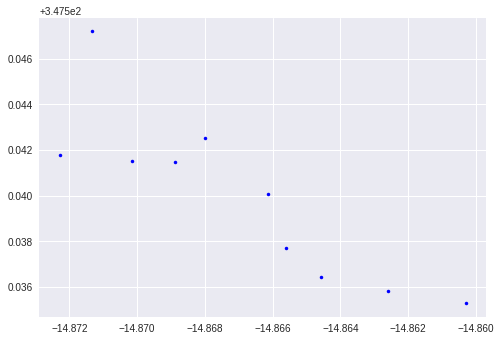

In [128]:
plt.plot(file['dec'], file['ra'], '.b')

In [129]:
dec_rand = np.random.uniform(min(file['dec']), max(file['dec']), 10)

In [130]:
ra_rand = np.random.uniform(min(file['ra']), max(file['ra']), 10)

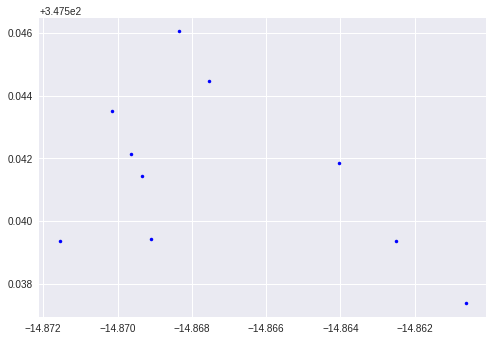

In [131]:
plt.plot(dec_rand, ra_rand, '.b')

### **Función para calcular distancias.**

In [132]:
def distance(x1,x2,y1,y2):
    return math.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)

In [133]:
file['dec'] = file['dec']*math.pi/180
file['ra'] = file['ra']*math.pi/180

In [134]:
x = np.sin(file['dec'])*np.cos(file['ra'])
y = np.sin(file['ra'])*np.sin(file['dec'])
z = np.cos(file['dec'])

In [135]:
x_rand = np.random.uniform(min(x),max(x),20)
y_rand = np.random.uniform(min(y),max(y),20)
z_rand = np.random.uniform(min(z),max(z),20)

In [136]:
from mpl_toolkits import mplot3d

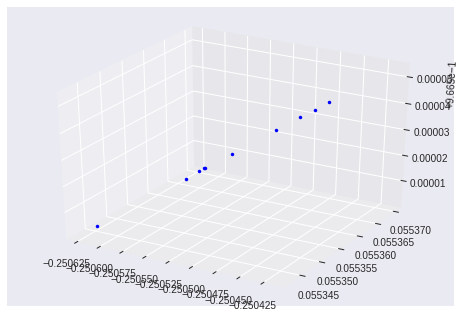

In [137]:
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, '.b')

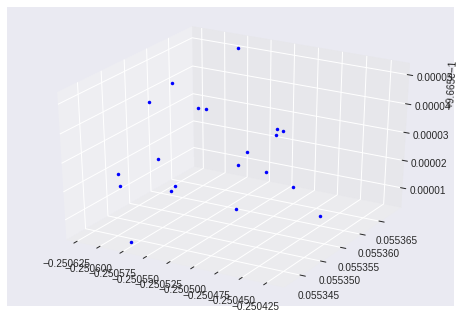

In [138]:
ax = plt.axes(projection='3d')
ax.plot3D(x_rand, y_rand, z_rand, '.b')

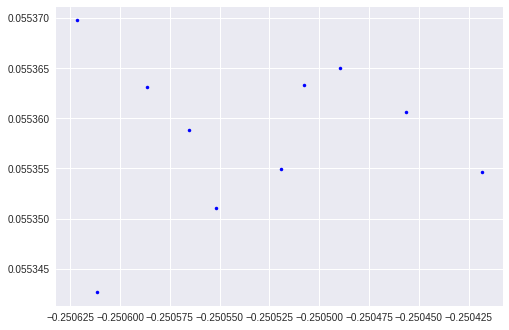

In [139]:
plt.plot(x,y,'.b')

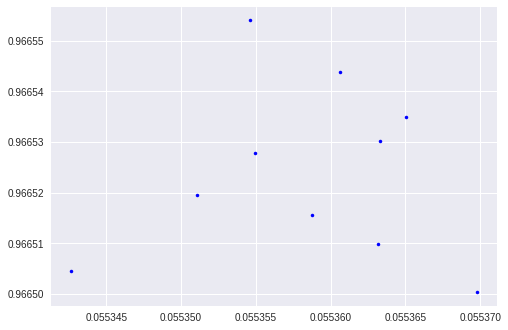

In [140]:
plt.plot(y,z,'.b')

Función para la distancia:

In [141]:
def distance(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 + (p1[2]-p2[2])**2)

In [142]:
dd = []
dr = []
rr = []
def correlation(p, datos):
    for i in range(datos):
        for j in range(i+1, datos):         
            dd.append(distance(p[i],p[j]))
    return np.sum(dd)

¿Funciona 'distance'?

In [143]:
distance([2,3,4],[1,2,3])

1.7320508075688772

In [144]:
p1 = np.array([x,y,z])

In [145]:
p1.T[0]
p1 = p1.T

¿Funciona correlación?

In [146]:
correlation(p1, 10)

0.00378405216145126

Ahora modificamos nuestras funciones para calcular DD, DR y RR. 

In [229]:
def distance(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 + (p1[2]-p2[2])**2)

dd = []
dr = []
rr = []

# Esto es para DD
def dede(p, datos):
    for i in range(datos):
        for j in range(i+1, datos):         
            dd.append(distance(p[i],p[j]))
    return np.sum(dd)

# Esto es para DR
def der(p, p_rand, datos, datos_rand):
    for i in range(datos):
        for j in range(datos_rand):         
            dr.append(distance(p[i],p_rand[j]))
    return np.sum(dr)

# Esto es para RR, que es la misma función para DD, pero la incluímos para obtener la correlación.
def rere(p_rand, datos_rand):
    for i in range(datos_rand):
        for j in range(i+1, datos_rand):         
            rr.append(distance(p_rand[i],p_rand[j]))
    return np.sum(rr)

#función de correlación
def correlation(p,p_rand, datos, datos_rand):
    dd_nd = dede(p,datos)/(datos*(datos-1)/2)
    dr_ndr = der(p,p_rand, datos, datos_rand)/(datos*datos_rand)
    rr_nr = rere(p_rand,datos_rand)/((datos_rand)*(datos_rand-1)/2)
    return (dd_nd-2*dr_ndr+rr_nr)/rr_nr

Intentamos con los 10 puntos que teníamos al inicio.

In [148]:
p1 = np.array([x,y,z]).T
p1_rand = np.array([x_rand, y_rand, z_rand]).T

In [149]:
print(p1, p1_rand)

[[-0.25048945  0.05536506  0.96653492]
 [-0.25050772  0.05536331  0.96653028]
 [-0.25051896  0.05535497  0.96652785]
 [-0.25045645  0.05536061  0.96654372]
 [-0.25041811  0.0553546   0.966554  ]
 [-0.25062177  0.05536977  0.96650034]
 [-0.25058642  0.05536315  0.96650989]
 [-0.2506113   0.05534265  0.96650461]
 [-0.25056536  0.05535878  0.9665156 ]
 [-0.25055196  0.05535105  0.96651952]] [[-0.25061056  0.05536025  0.96654348]
 [-0.25062104  0.05536864  0.96652706]
 [-0.25058374  0.05536247  0.96653416]
 [-0.25060959  0.05535941  0.96650509]
 [-0.250514    0.05535661  0.96652829]
 [-0.250421    0.05534327  0.96655239]
 [-0.2505763   0.05534319  0.96650382]
 [-0.25049242  0.05534912  0.96651634]
 [-0.25045506  0.05536105  0.96650522]
 [-0.25060416  0.05534637  0.96652327]
 [-0.25047734  0.05535276  0.96652689]
 [-0.25057535  0.05536822  0.96655157]
 [-0.25045177  0.05535334  0.96652283]
 [-0.25045285  0.05534938  0.96654411]
 [-0.25054911  0.05534405  0.96653417]
 [-0.25059801  0.0553456

In [150]:
correlation(p1, p1_rand, 10, 20)

1.1998304287582597

**Lo intentamos con todos los datos.**

In [194]:
file = pd.read_csv('result.txt')

In [195]:
file = file[0:2000]

Transformamos:

In [196]:
file['dec'] = file['dec']*math.pi/180
file['ra'] = file['ra']*math.pi/180

In [197]:
x = np.sin(file['dec'])*np.cos(file['ra'])
y = np.sin(file['ra'])*np.sin(file['dec'])
z = np.cos(file['dec'])

In [198]:
x_rand = np.random.uniform(min(x),max(x),len(x))
y_rand = np.random.uniform(min(y),max(y),len(x))
z_rand = np.random.uniform(min(z),max(z),len(x))

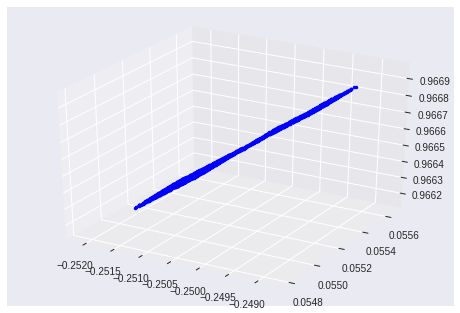

In [199]:
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, '.b')

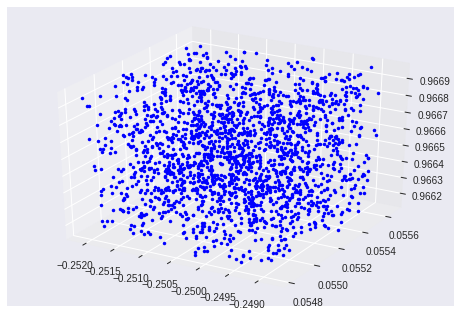

In [200]:
ax = plt.axes(projection='3d')
ax.plot3D(x_rand, y_rand, z_rand, '.b')

In [201]:
p1 = np.array([x,y,z]).T
p1_rand = np.array([x_rand, y_rand, z_rand]).T

In [202]:
correlation(p1, p1_rand, len(x), len(x))

KeyboardInterrupt: 

**Hacemos un intento con dos random's, para ver si el coeficiente de correlación es cero.**

In [203]:
x_rand = np.random.uniform(min(x),max(x),len(x))
y_rand = np.random.uniform(min(y),max(y),len(x))
z_rand = np.random.uniform(min(z),max(z),len(x))

In [204]:
p1_rand = np.array([x_rand, y_rand, z_rand]).T

In [205]:
x2_rand = np.random.uniform(min(x),max(x),len(x))
y2_rand = np.random.uniform(min(y),max(y),len(x))
z2_rand = np.random.uniform(min(z),max(z),len(x))

In [206]:
p2_rand = np.array([x2_rand, y2_rand, z2_rand]).T

In [207]:
correlation(p1_rand, p2_rand, len(x), len(x))

-0.3775438497275957

(array([351800., 844554., 890849., 769597., 636265., 516610., 410251.,
        306034., 234895., 189399., 143056., 102466.,  63051.,  32803.,
          4870.]),
 array([7.41495630e-07, 2.29112688e-04, 4.57483880e-04, 6.85855072e-04,
        9.14226265e-04, 1.14259746e-03, 1.37096865e-03, 1.59933984e-03,
        1.82771103e-03, 2.05608223e-03, 2.28445342e-03, 2.51282461e-03,
        2.74119580e-03, 2.96956699e-03, 3.19793819e-03, 3.42630938e-03]),
 <a list of 15 Patch objects>)

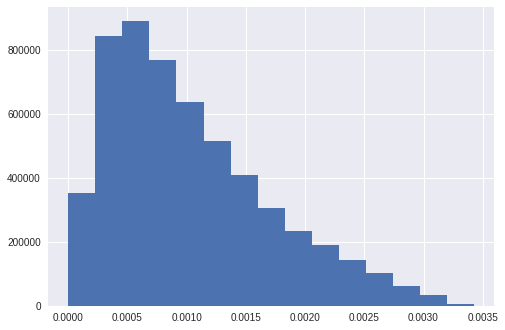

In [208]:
plt.hist(dd, bins= 15)

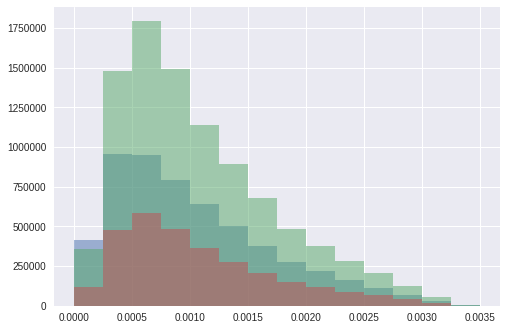

In [210]:
minimo = 0.0
maximo = 0.0035
bins = np.linspace(minimo, maximo, 15)
dd_c,bins,patch = plt.hist(dd, bins= bins, alpha=0.5);
dr_c,_,_ = plt.hist(dr, bins= bins, alpha=0.5);
rr_c, _, _ = plt.hist(rr, bins= bins, alpha=0.5);

In [215]:
nd = len(x_rand)*(len(x_rand)-1)/2
nr = len(x_rand)*(len(x_rand)-1)/2
ndr = len(x_rand)*len(x_rand)

#Correlation_r = ((dd_c/nd)-2*(dr_c/ndr)+(rr_c/nr))/(rr_c/nr)

Correlation_r = (dd_c/rr_c) -1

In [216]:
Correlation_r

array([2.48749233, 0.990134  , 0.6236385 , 0.63607949, 0.76645416,
       0.82938739, 0.81523471, 0.79626457, 0.82932275, 0.81674612,
       0.71789352, 0.64849619, 0.74725405, 0.39985745])

In [231]:
def random(x,y,z,datos):
    x_rand = np.random.uniform(min(x),max(x),datos)
    y_rand = np.random.uniform(min(y),max(y),datos)
    z_rand = np.random.uniform(min(z),max(z),datos)
    return x_rand, y_rand, z_rand

In [232]:
r1x, r1y, r1z = random(x,y,z,1000)
r2x, r2y, r2z = random(x,y,z,1000)

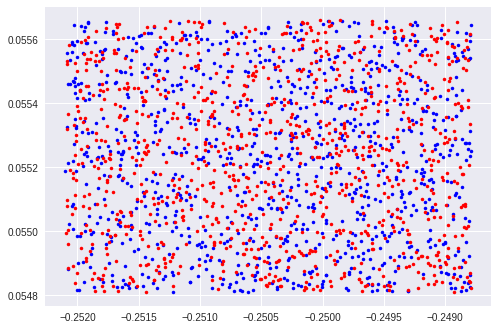

In [233]:
plt.plot(r1x, r1y, '.b')
plt.plot(r2x, r2y, '.r')

In [234]:
correlation(np.array([r1x,r1y,r1z]).T,np.array([r2x,r2y,r2z]).T, len(r1z), len(r2z))

0.001226965922752769

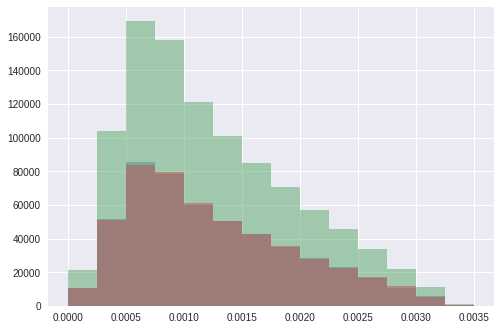

In [235]:
minimo = 0.0
maximo = 0.0035
bins = np.linspace(minimo, maximo, 15)
dd_c,bins,patch = plt.hist(dd, bins= bins, alpha=0.5);
dr_c,_,_ = plt.hist(dr, bins= bins, alpha=0.5);
rr_c, _, _ = plt.hist(rr, bins= bins, alpha=0.5);

In [240]:
nd = len(r1x)*(len(r1x)-1)/2
nr = len(r1x)*(len(r1x)-1)/2
ndr = len(r1x)*len(r1x)

#Correlation_r = ((dd_c/nd)-2*(dr_c/ndr)+(rr_c/nr))/(rr_c/nr)

Correlation_r = (dd_c/rr_c) -1
Correlation_r

array([ 0.00152236,  0.01553349,  0.02498296, -0.01199648, -0.02354765,
       -0.00756932, -0.00437151, -0.00418126,  0.02023988,  0.0502542 ,
       -0.03487557, -0.0971681 ,  0.0251247 ,  0.22504892])

In [241]:
Correlation_r = ((dd_c/nd)-2*(dr_c/ndr)+(rr_c/nr))/(rr_c/nr)

In [242]:
Correlation_r 

array([ 0.0012411 , -0.01651599,  0.00164267,  0.0031701 ,  0.00295459,
       -0.00493753,  0.00904844,  0.00978551, -0.01823506,  0.00838755,
        0.00698405,  0.00207586, -0.01237022,  0.04718982])

In [ ]:
array([2.48749233, 0.990134  , 0.6236385 , 0.63607949, 0.76645416,
       0.82938739, 0.81523471, 0.79626457, 0.82932275, 0.81674612,
       0.71789352, 0.64849619, 0.74725405, 0.39985745])

In [230]:
dd

[]